In [1]:
import pandas as pd

### Load Dataset

In [2]:
data = pd.read_csv("data/train.csv", index_col = "id")

print(data.shape)
data.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


### Preprocessing

In [3]:
label_name = "target"
label_name

'target'

In [4]:
feature_names = data.columns.difference([label_name])

print(len(feature_names))
feature_names

93


Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14',
       'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_2',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_3', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_4', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_5', 'feat_50', 'feat_51', 'feat_52',
       'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58',
       'feat_59', 'feat_6', 'feat_60', 'feat_61', 'feat_62', 'feat_63',
       'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69',
       'feat_7', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74',
       'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_8',
       'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84

In [5]:
X = data[feature_names]

print(X.shape)
X.head()

(61878, 93)


,feat_1,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_9,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,1,0,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0


In [6]:
y = data[label_name]

print(y.unique())

print(y.shape)
y.head()

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
(61878,)


id
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
Name: target, dtype: object

### Use Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [8]:
model.fit(X, y) # X = features, y = label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [9]:
y_predict = model.predict(X)

print(y_predict.shape)
y_predict

(61878,)


array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [10]:
accuracy = (y_predict == y).mean()

print("accuracy = {:.6f}".format(accuracy))

accuracy = 1.000000


### Hold-Out Validation

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43314, 93) (43314,)
(18564, 93) (18564,)


In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_score = (y_train == y_train_predict).mean()
test_score = (y_test == y_test_predict).mean()

print("Accuracy(train) = {:.6f}".format(train_score))
print("Accuracy(test) = {:.6f}".format(test_score))

Accuracy(train) = 1.000000
Accuracy(test) = 0.709869


### Hyperparameter

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=20)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_score = (y_train == y_train_predict).mean()
test_score = (y_test == y_test_predict).mean()

print("Accuracy(train) = {:.6f}".format(train_score))
print("Accuracy(test) = {:.6f}".format(test_score))

Accuracy(train) = 0.824445
Accuracy(test) = 0.717787


### High Bias - Variance Trade Off

In [14]:
from sklearn.tree import DecisionTreeClassifier

max_depth_list = range(2, 60)

history = []

for max_depth in max_depth_list:
    print(max_depth)
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_score = (y_train == y_train_predict).mean()
    test_score = (y_test == y_test_predict).mean()

    history.append({
        'max_depth': max_depth,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score
    })

history = pd.DataFrame(history)
history.head()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


,accuracy(test),accuracy(train),max_depth
0,0.438160,0.439950,2
1,0.477537,0.477375,3
2,0.524402,0.527982,4
3,0.525479,0.529090,5
4,0.555591,0.558849,6


In [15]:
history

,accuracy(test),accuracy(train),max_depth
0,0.438160,0.439950,2
1,0.477537,0.477375,3
2,0.524402,0.527982,4
3,0.525479,0.529090,5
4,0.555591,0.558849,6
5,0.570297,0.568638,7
6,0.599224,0.605301,8
7,0.628528,0.634345,9
8,0.652984,0.660895,10
9,0.662034,0.676964,11


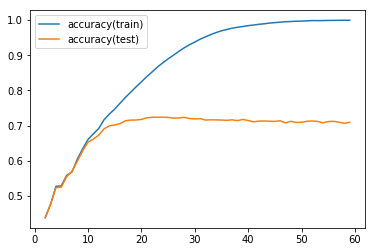

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['max_depth'], history['accuracy(train)'], label = 'accuracy(train)')
plt.plot(history['max_depth'], history['accuracy(test)'], label = 'accuracy(test)')

plt.legend()

위의 예제에서 60에 가까워 질 수록, test accuracy가 더 덜어지지 않는 이유는 parameter가 max_depth이기 때문이다. 일정 시점에 더 이상 depth를 늘릴 수 없거나, 늘릴 이유가 없기 때문에 current depth가 일정하게 유지 된다.


### min_sample_split

In [17]:
from sklearn.tree import DecisionTreeClassifier

min_samples_split_list = [10, 30, 100, 300, 1000, 3000, 10000]

history = []

for min_samples_split in min_samples_split_list:
    print(min_samples_split)
    model = DecisionTreeClassifier(random_state=42, min_samples_split=min_samples_split)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_score = (y_train == y_train_predict).mean()
    test_score = (y_test == y_test_predict).mean()

    history.append({
        'min_samples_split': min_samples_split,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score
    })
    
history = pd.DataFrame(history)
history.head()

10
30
100
300
1000
3000
10000


,accuracy(test),accuracy(train),min_samples_split
0,0.713801,0.911738,10
1,0.714717,0.842545,30
2,0.720642,0.779586,100
3,0.713585,0.736921,300
4,0.681265,0.688623,1000


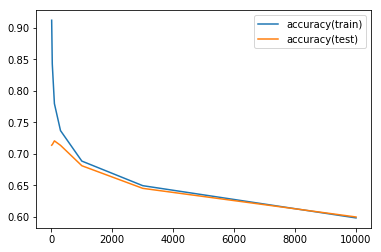

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['min_samples_split'], history['accuracy(train)'], label = 'accuracy(train)')
plt.plot(history['min_samples_split'], history['accuracy(test)'], label = 'accuracy(test)')

plt.legend()

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 10,random_state = 42)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_score = (y_train == y_train_predict).mean()
test_score = (y_test == y_test_predict).mean()

print("Accuracy(train) = {:.6f}".format(train_score))
print("Accuracy(test) = {:.6f}".format(test_score))

C:\Users\hongji\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy(train) = 0.993028
Accuracy(test) = 0.779412


In [23]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = range(2, 60)

history = []

for n_estimators in n_estimators_list:
    print(n_estimators)
    model = RandomForestClassifier(random_state=42, n_estimators=n_estimators)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_score = (y_train == y_train_predict).mean()
    test_score = (y_test == y_test_predict).mean()

    history.append({
        'n_estimators': n_estimators,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score
    })

history = pd.DataFrame(history)
history.head()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


,accuracy(test),accuracy(train),n_estimators
0,0.667259,0.875144,2
1,0.715632,0.944452,3
2,0.736856,0.957843,4
3,0.749300,0.972988,5
4,0.757919,0.979499,6


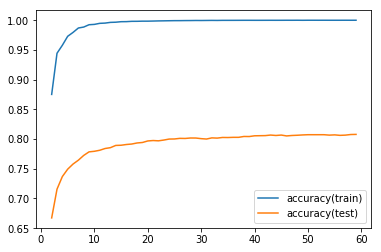

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['n_estimators'], history['accuracy(train)'], label = 'accuracy(train)')
plt.plot(history['n_estimators'], history['accuracy(test)'], label = 'accuracy(test)')

plt.legend()

In [25]:
from sklearn.ensemble import RandomForestClassifier

max_features_list = range(2, 60)

history = []

for max_features in max_features_list:
    print(max_features)
    model = RandomForestClassifier(random_state=42, max_features = max_features)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_score = (y_train == y_train_predict).mean()
    test_score = (y_test == y_test_predict).mean()

    history.append({
        'max_features': max_features,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score
    })

history = pd.DataFrame(history)
history.head()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


,accuracy(test),accuracy(train),max_features
0,0.746014,0.992935,2
1,0.756895,0.993051,3
2,0.766376,0.993651,4
3,0.767399,0.992912,5
4,0.776234,0.993120,6


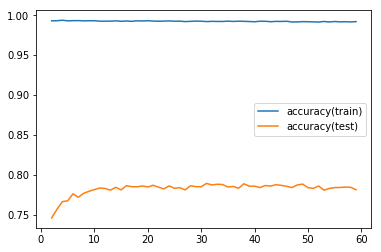

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['max_features'], history['accuracy(train)'], label = 'accuracy(train)')
plt.plot(history['max_features'], history['accuracy(test)'], label = 'accuracy(test)')

plt.legend()

### Gradient Boosting Machine

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state = 42)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_score = (y_train == y_train_predict).mean()
test_score = (y_test == y_test_predict).mean()

print("Accuracy(train) = {:.6f}".format(train_score))
print("Accuracy(test) = {:.6f}".format(test_score))